In [67]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


In [68]:
import warnings
warnings.filterwarnings('ignore')
from math import factorial
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3d
import time
from tqdm import tqdm

In [69]:
# Problem definition
NOBJ = 4
NDIM = 5
P = 12
H = factorial(NOBJ + P - 1) / (factorial(P) * factorial(NOBJ - 1))

BOUND_LOW, BOUND_UP = 0, 20

In [70]:
import pandas as pd
dataset = pd.read_csv('DistanceMatrixnan2.csv',index_col=0)
dataset.head(5)

,Budapest,Munich,Prague,Vienna,Dusseldor,Frankfurt,Zurich,Paris,Milan,Barcelona,...,Madrid,Helsinki,Copenhage,London,Madley,Dublin,Brussels,Amsterdarm,Gothenburn,Stockholm
City,,,,,,,,,,,,,,,,,,,,,
Budapest,0.000000,0.190528,0.150687,0.072648,0.331890,0.275314,0.267517,0.422095,0.266903,0.508226,...,0.669677,0.495202,0.343437,0.491591,0.557619,0.642859,0.382952,0.388765,0.417275,0.446947
Munich,0.190537,0.000000,0.101719,0.120674,0.165036,0.103285,0.082049,0.232074,0.118155,0.357844,...,0.503587,0.539146,0.285290,0.311408,0.377994,0.467361,0.204380,0.226848,0.361096,0.445927
Prague,0.150687,0.101719,0.000000,0.085696,0.187663,0.138790,0.178459,0.299221,0.218990,0.459194,...,0.601264,0.441583,0.214954,0.350333,0.414945,0.496911,0.243335,0.240854,0.292487,0.357513
Vienna,0.072648,0.120674,0.085696,0.000000,0.259921,0.202740,0.200683,0.350645,0.212169,0.458113,...,0.613816,0.488236,0.295152,0.419017,0.485112,0.570787,0.310363,0.317702,0.371830,0.421280
Dusseldorf,0.331890,0.165036,0.187663,0.259921,0.000000,0.061775,0.151814,0.139554,0.225420,0.389742,...,0.490887,0.509768,0.212325,0.162851,0.227309,0.310970,0.059255,0.061852,0.269628,0.389362


In [71]:
MU = int(H)
NGEN = 51
CXPB = 1.0
MUTPB = 1.0/NDIM

In [72]:
ref_points = tools.uniform_reference_points(NOBJ, P)
ref_points

array([[0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.08333333, 0.91666667],
       [0.        , 0.        , 0.16666667, 0.83333333],
       ...,
       [0.91666667, 0.        , 0.08333333, 0.        ],
       [0.91666667, 0.08333333, 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ]])

In [73]:
def uniform(low, up, size=None):
    try:
        return[random.uniform(a,b) for a, b in zip(low, up)]
    except TypeError:
        return [random.uniform(a,b) for a, b in zip([low] * size, [up] *size)]
uniform(BOUND_LOW, BOUND_UP, NDIM)

[19.497043570550137,
 0.9487770950196395,
 18.194517176935804,
 12.159262910954654,
 14.038878319028687]

In [74]:
D_lower = 0
D_upper = 21
def uniform(low, up, size=None):
    return random.sample(range(D_lower,D_upper), NDIM)
uniform(BOUND_LOW, BOUND_UP, NDIM)

[17, 12, 13, 4, 2]

In [75]:
!pip install pymop
!pip install pymoo

In [76]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd
pd.set_option('display.max_rows', None)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,) * NOBJ)
creator.create("Individual", list, fitness=creator.FitnessMin)
import math
#Introduction of repairs operator/local mutation to improve on NSGA-111 code.
import autograd.numpy as anp        
def nuNumber(dup, row, ct = 1):    #dup=duplicate, row=row, and the ct=control variable.
                  #print('duplicated number is ', dup, ' in ', row, ' iterator is ', ct)
                  if dup < 20:     #setting check condition to the maximum number of BtEurope
                    nu = dup + ct
                  else:
                    nu = dup - ct
                  if nu < 1:
                    nuNumber(nu + 1, row, ct + 1)
                  if nu in row:
                    nu = nuNumber(nu + 1, row, ct + 1)
                  
                  if (math.isnan(nu)):   #when nan appears in row, then replace with random from q gen
                      for q in range(0,20):
                        if(q not in row ):
                          nu = q
                          break
                  return round(nu)

def MOCP(VARS, NDIM): #passing VARS=init pop and NDIM=number of decision variables into the funct.
        #print(type(VARS))
       
        for i in range(0, len(VARS)):
          #test_list[i] = int(test_list[i])
          for j in range(0, len(VARS[i])):
            b4 = VARS[i][j]
            VARS[i][j] = round(VARS[i][j])
            #print("before ", b4, " after ",VARS[i][j])
        
        #print("Details of X below")

        #VARS.apply(pd.to_numeric)
        #VARS.astype('int32').dtypes
        #df = VARS.convert_objects(convert_numeric=True)
        dataset = pd.read_csv('DistanceMatrixnan2.csv',index_col=0)
        global x
        x = pd.DataFrame(VARS)
        
        
        city = dataset.columns.to_list()
        #print("city is \n", city)
        v = len(dataset)
        #print("length of dataset is ", v)
        minL = []
        sumL = []
        maxC2C = []
        avgC2C = []
        C2C = []
        end_values = []
        
        
        for index, row in x.iterrows():
            #print('index is ', index, 'row is ', row)
            li = []
            r = row.tolist()
            #REMOVE DUPLICATE FROM ROW
            
            rChk = []
            for id,w in enumerate(r):
              if w not in rChk:
                rChk.append(w)
              else:
                #print('duplicate detected in ', r)
                for q in range(0,19):
                  if(q not in r ):
                    print(r[id], " about to be changed to ", q)
                    r[id] = q
                    x.loc[index,id] = q
                    rChk.append(r[id])
                    break
                #print("new row is ", r)
                   
            #end of duplicate checker
            cont_distance =[]
            cont_distanc =[]
            ctyu = []
            #endValLIst = []
            #print("row is ", r)
            sam = 0
            a = 0
            sm = []
            #print("\n")
            #print("R check check is \n",r)
            
            for i in range(len(r)):
              #print("city ", r[i])
              ctyu.append(city[r[i]])
              #print('city being appended is ',city[r[i]])

            
              #print('selected', city[r[i]]  )
              a = i
              dty = dataset[ctyu].iloc[0]

              #print('tobi is ',dty)
              cont_distance = max(dty)
              
            ydt = dataset[ctyu]
            new_dataset = ydt.dropna() 
            
            row_list = []
            new_list =[]
            ij = []
            values = pd.DataFrame()
            for index, row in ydt.iterrows():
                #print('index is length ',len(row))
                for k in range(len(row)):
                  
                  if isinstance(row.loc[ctyu[k]], pd.core.series.Series):
                    
                    row_list.append(row.loc[ctyu[k]].iloc[0])
                  else:
                    row_list.append(row.loc[ctyu[k]])
                #print("row_list\n", row_list)
                for i in row_list:
                  if i != min(row_list):
                        #print("I is not equal to min of rowlist")
                        new_list.append(0)
                  else:
                        new_list.append(1)
                #print("New list is \n",new_list)
                to_load = pd.Series(new_list, index=ctyu)
                #print("loaded list is \n", to_load)
                values = values.append(to_load, ignore_index=True)
                #print("values \n", values)
                row_list =[]
                new_list =[]

            result = values.apply(pd.value_counts).drop([0])
            #print("result\n", result,"\nMAX", result.max(axis = 1), "\nMIN", result.min(axis = 1))
            end_val = (result.max(axis = 1) - result.min(axis = 1))/result.max(axis = 1)
            
            
            #print("end_val\n",end_val)
            end_values.append(end_val)
           

            lo = ydt.iloc[0]
            #print(lo)
            for i in range(len(lo)):
              #print(lo[i])
              si = 0
              a = i
              #sm.append(lo[i])
              for j in range(i +1,len(lo), 1):
                si = lo[i] + lo[j]
                sm.append(si)
            t = 0
            for u in sm:
              t = t + u
            #print(t)
            C2 = (t)/(math.comb(len(r), 2))
            
            C2C.append(C2)
            maxC2C.append(cont_distance)
            avgC2C.append(C2)

            for i in r:
              li.append(city[i])
            #print("A new row ") 
            #print(li)
            new_dataset2 = dataset[li]  
            new_dataset2 = new_dataset2.dropna() 
            new_dataset2 = new_dataset2.reset_index(drop=True)
            new_dataset2 =  pd.DataFrame(new_dataset2)
            mins =  new_dataset2.min(axis=1)
            sum = 1/(abs(len(new_dataset2))) * np.sum(mins)
            #print(new_dataset2)
            minL.append(mins)
            sumL.append(sum)
        minDataset = pd.DataFrame(minL)
        maxC2CDataset = pd.DataFrame(maxC2C)
        C2CDataset = pd.DataFrame(C2C)
        EndValDataset = pd.DataFrame(end_values)
        avgC2CDataset = pd.DataFrame(avgC2C)
        
        
        #norm_EndValDataset = EndValDataset / (EndValDataset.max())
        #print('EndValDataset.max() is \n', EndValDataset.max())
        #print('EndValDataset is \n',norm_EndValDataset)
        #return norm_EndValDataset
        #endvalues_norm = norm_EndValDataset[1.0].to_list()
        
        maxNu = minDataset.max(axis=1) #generates the maximum of minimum
        #print("Maximum of Minimum is ")
        #print(maxNu)
        #print("\n\n")
        #print("Sum")
        maxNuDataset = pd.DataFrame(maxNu)
        #fscDataset = pd.DataFrame(fsc)
        sumDataset = pd.DataFrame(sumL) #generates the sum
        
    
        
        
        #print ("maxNu", maxNu, "\nmaxC2C", maxC2C, "\nCSC",C2C, "\nend_values",   end_values, "\nsumDataset", sumL   )
        #f = anp.column_stack([maxNu, maxC2C, sumL ])
        f = anp.column_stack([maxNu, maxC2C,C2C, sumL ])
        #f = anp.column_stack([maxNu, maxC2C,C2C, end_values, sumL ])
        #print("Our F\n", f)
        return f
    
        #out["G"] = anp.column_stack([g1, g2])
#MOCP(VARS, NDIM)

In [78]:
#The repair operator is mostly problem dependent. Most commonly it is used to make sure the algorithm
#is only searching in the feasible space. It is applied after the offsprings have been reproduced
def fixer(VA):
  for i in range(len(VA)):
    k = []
    for j in range(len(VA[i])):
      VA[i][j] = int(round(VA[i][j]))
      if VA[i][j] not in k:
        k.append(VA[i][j])
        #print(k)
      else:
        f = 0
        #print("row ", i, "duplicate found in ", VA[i])
        for q in range(VA[i][j], 20):
          if q not in k:
            #print(q," proposed to change the initial ", VA[i][j])
            VA[i][j] = q
            k.append(q)
            f = 1
            break
        if f == 0: 
          for q in reversed(range(0, VA[i][j])):
            if q not in k:
              #print(q," proposed to change the initial ", VA[i][j])
              VA[i][j] = q
              k.append(q)
              f = 1
              break
        
            
        
  return VA

In [79]:
import platypus as plat
#import pygmo as pg
from pygmo import hypervolume
from platypus import Hypervolume, calculate, display 
import psutil, tracemalloc

100%|██████████| 50/50 [3:29:01<00:00, 250.83s/it]  

time taken is 12797.132257700003
current memory utilization is 1.257276MB
peak memory utilisation is 52.517566MB
cpu load/core is [0.0, 0.125, 0.25]


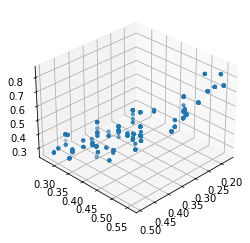

In [80]:
start = time.perf_counter()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,) * NOBJ)
creator.create("Individual", list, fitness=creator.FitnessMin)
# Toolbox initialization
#def uniform(low, up, size=None):
#    try:
#        return [random.randint(a, b) for a, b in zip(low, up)]
#    except TypeError:
#        return [random.randint(a, b) for a, b in zip([low] * size, [up] * size)]
def uniform(low, up, size=None):
  return random.sample(range(low,up),NDIM)
   
#uniform(BOUND_LOW, BOUND_UP, NDIM)
toolbox = base.Toolbox()

toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
#toolbox.register("attr_float", popGenNoSeed)
#popGenNoSeed()
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=30.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/NDIM)
toolbox.register("select", tools.selNSGA3, ref_points=ref_points)
 
#toolbox.register("select", tools.selNSGA3, ref_points=ref_points)
##



#from pymoo.model.population import Population
solutions = []
def main(seed=None):
    global initial_pop
    global hyper
    hyper = []
    random.seed(seed)
    # Initialize statistics object
    pop = toolbox.population(n=MU)
    initial_pop = pop
    
    #print ("my dipo")
    #print (pop1)
    

    #hv = hypervolume(pop1)
    #rp = hv.refpoint(offset = 2.0)
    #hcm = hv.compute(rp)
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    ObjV = MOCP(invalid_ind, NDIM)
    for ind, i in zip(invalid_ind, range(MU)):
        ind.fitness.values = ObjV[i, :]
    #print(ObjV)
    #print(ftDf)
    
    fitnsga3 = [ind.fitness.values  for ind in pop]
    ftDfnsga3 = pd.DataFrame(fitnsga3)
    hyp = hypervolume(ftDfnsga3[[0, 1, 2, 3]].values)
    hypvol = hyp.compute([20, 20, 20, 20]) / np.prod([20, 20, 20, 20])
    hyper.append(hypvol)
    # Begin the generational process

    global offspring
    
    exec_timensga3 = []
    avg_cpu_utilNSGA3 = []
    for gen in tqdm(range(1, NGEN)):
        #start = time.perf_counter()
        #core_amount = psutil.cpu_count()
        #core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
        #avg_cpu_util2 = psutil.cpu_percent()
        
   
        
        #print("generation is ", gen)
        offspring = algorithms.varAnd(pop, toolbox, CXPB, MUTPB)
        #print("OFFSPRING IS ", offspring)
        offspring = fixer(offspring)
        offspring = fixer(offspring)
        #print("modified offspring", offspring)
        #return offspring
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        #print("Invalid individuals ", invalid_ind)
        #function to be applied on offspring
        #  -float to integers
        #  -remove duplicates
        #  -

        ObjV = MOCP([ind for ind in offspring if not ind.fitness.valid], NDIM)
        for ind, i in zip(invalid_ind, range(MU)):
            ind.fitness.values = ObjV[i, :]
        # Select the next generation population from parents and offspring
        pop = toolbox.select(pop + offspring, MU)
        fitnsga3 = [ind.fitness.values  for ind in pop]
        ftDfnsga3 = pd.DataFrame(fitnsga3)
        hyp = hypervolume(ftDfnsga3[[0, 1, 2, 3]].values)
        hypvol = hyp.compute([20, 20, 20, 20]) / np.prod([20, 20, 20, 20])
        hyper.append(hypvol)
        
        core_amount = psutil.cpu_count()
        core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
        avg_cpu_util3 = psutil.cpu_percent()
        avg_cpu_utilNSGA3.append(avg_cpu_util3)
        end = time.perf_counter()
        end_time = end - start
    
        exec_timensga3.append(end_time)
        
        
        
    
    
    #'''cpu utilization'''
    #core_amount = psutil.cpu_count()
    #core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
    #avg_cpu_util2 = psutil.cpu_percent()
    
    
    
    return pop, core_load, avg_cpu_utilNSGA3, exec_timensga3
 
if __name__ == "__main__":
    '''time measurement'''
    tracemalloc.start()
    #start = time.perf_counter()
    pop, core_load, avg_cpu_utilNSGA3, exec_timensga3 = main()
    current, peak = tracemalloc.get_traced_memory()
    end = time.perf_counter()
    tracemalloc.stop()
    exec_timeNSGA3 = end - start
    
    print("time taken is {}".format(exec_timeNSGA3) )
    print(f"current memory utilization is {current/10**6}MB")
    print(f"peak memory utilisation is {peak/10**6}MB")
    print("cpu load/core is {}".format(core_load))
    
    #print("time taken is {}".format(exec_time2))
    #print("time taken is {}".format(exec_timeNSGA2))
    #print(f"current memory utilization is {current/10**6}MB")
    #print(f"peak memory utilisation is {peak/10**6}MB")
    #print("cpu load/core is {}".format(core_load))
    #print("avg_cpu utilisation2 is {}".format(avg_cpu_utilNSGA2))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    p = np.array([ind.fitness.values for ind in pop])
    ax.scatter(p[:, 0], p[:, 1], p[:, 2], marker="o", s=10)
    ax.view_init(elev=30, azim=45)
    plt.grid(True)
    plt.show()

In [81]:
avg_cpu_utilNSGA3

[14.0,
 43.0,
 28.6,
 24.6,
 30.6,
 29.9,
 30.2,
 30.1,
 30.0,
 29.8,
 30.4,
 30.2,
 29.8,
 30.8,
 30.1,
 30.3,
 30.2,
 25.5,
 19.4,
 17.1,
 16.9,
 17.0,
 17.1,
 16.9,
 17.0,
 17.4,
 17.3,
 17.1,
 16.8,
 18.6,
 18.1,
 27.5,
 29.5,
 30.3,
 29.8,
 29.3,
 29.4,
 29.3,
 29.4,
 29.3,
 30.1,
 29.4,
 29.4,
 29.3,
 29.6,
 24.2,
 19.9,
 18.8,
 18.7,
 18.6]

In [82]:
exec_timensga3

[494.2090743000008,
 823.7732346999983,
 1096.0378348000013,
 1349.629075500001,
 1614.2325566,
 1877.5777973000004,
 2141.4225711,
 2404.459669,
 2666.353155500001,
 2928.3947068999987,
 3191.113593599999,
 3455.2097114999997,
 3710.2197190000006,
 3966.4466600000014,
 4219.619196399999,
 4473.948830900001,
 4728.262978800001,
 4976.089785199998,
 5215.5429334,
 5449.253623199998,
 5683.190053099999,
 5916.367395000001,
 6149.387626199998,
 6382.720686200002,
 6616.4821486,
 6852.002313199999,
 7088.163852600002,
 7321.619892100003,
 7553.964876099999,
 7791.298645199997,
 8027.254910099997,
 8278.238645099998,
 8530.822027100003,
 8786.100856899997,
 9041.266070600002,
 9292.8221845,
 9544.9793125,
 9797.529911799997,
 10051.170647799998,
 10303.704478,
 10558.820112200003,
 10812.523005099996,
 11064.223521499996,
 11314.809861299997,
 11566.465184300003,
 11810.770512800002,
 12059.5105807,
 12305.311474399998,
 12551.2384695,
 12797.1289415]

In [83]:
core_load

[0.0, 0.125, 0.25]

In [84]:
initial_pop

[[13, 14, 7, 17, 10],
 [7, 13, 2, 1, 0],
 [1, 9, 10, 5, 18],
 [1, 7, 2, 13, 5],
 [9, 10, 5, 12, 4],
 [4, 2, 13, 10, 7],
 [11, 7, 18, 6, 10],
 [1, 9, 11, 3, 10],
 [10, 0, 18, 4, 9],
 [9, 17, 1, 6, 12],
 [7, 6, 13, 19, 2],
 [11, 12, 14, 17, 2],
 [2, 4, 16, 10, 8],
 [3, 12, 9, 13, 15],
 [15, 18, 19, 17, 9],
 [6, 14, 12, 3, 13],
 [6, 10, 9, 17, 0],
 [14, 7, 19, 17, 18],
 [6, 18, 9, 1, 7],
 [11, 10, 7, 16, 0],
 [16, 18, 17, 13, 3],
 [17, 14, 19, 10, 8],
 [14, 7, 13, 1, 15],
 [15, 8, 11, 4, 5],
 [5, 4, 10, 17, 12],
 [0, 17, 15, 19, 8],
 [5, 7, 14, 3, 0],
 [17, 10, 9, 18, 11],
 [13, 3, 5, 6, 15],
 [11, 7, 0, 4, 3],
 [16, 14, 9, 5, 13],
 [1, 17, 10, 5, 18],
 [6, 14, 2, 4, 18],
 [6, 8, 3, 9, 12],
 [19, 18, 10, 11, 3],
 [15, 8, 2, 3, 1],
 [9, 15, 0, 18, 8],
 [10, 19, 6, 4, 2],
 [13, 14, 9, 17, 16],
 [18, 15, 14, 19, 11],
 [6, 15, 0, 3, 2],
 [4, 17, 9, 6, 3],
 [17, 1, 10, 7, 11],
 [6, 13, 3, 4, 12],
 [4, 15, 12, 14, 17],
 [11, 16, 3, 6, 2],
 [14, 4, 9, 0, 1],
 [1, 18, 19, 5, 10],
 [0, 4, 1, 8, 17

In [85]:
pop

[[8, 19, 0, 1, 3],
 [8, 3, 14, 20, 0],
 [8, 0, 1, 2, 4],
 [20, 7, 1, 3, 0],
 [13, 17, 1, 3, 0],
 [6, 19, 14, 3, 9],
 [8, 3, 0, 17, 13],
 [17, 20, 15, 9, 1],
 [8, 0, 2, 3, 13],
 [8, 0, 1, 2, 5],
 [3, 13, 0, 2, 4],
 [2, 3, 1, 0, 5],
 [0, 1, 2, 3, 4],
 [6, 20, 7, 14, 3],
 [6, 3, 0, 1, 13],
 [0, 3, 14, 20, 9],
 [9, 13, 0, 1, 17],
 [9, 20, 15, 3, 5],
 [6, 19, 7, 3, 4],
 [8, 20, 0, 2, 17],
 [6, 20, 7, 0, 2],
 [9, 19, 0, 1, 17],
 [9, 20, 15, 4, 3],
 [0, 20, 14, 1, 9],
 [9, 20, 0, 3, 18],
 [0, 14, 1, 20, 4],
 [0, 13, 7, 2, 3],
 [6, 1, 2, 3, 0],
 [17, 19, 0, 9, 3],
 [3, 7, 0, 1, 2],
 [0, 19, 7, 8, 1],
 [8, 3, 0, 4, 13],
 [9, 3, 0, 4, 13],
 [8, 3, 1, 4, 13],
 [8, 19, 0, 1, 17],
 [8, 6, 0, 1, 2],
 [13, 3, 0, 1, 5],
 [17, 19, 1, 8, 0],
 [17, 19, 0, 9, 3],
 [6, 20, 7, 0, 2],
 [8, 6, 0, 1, 2],
 [17, 3, 0, 9, 13],
 [9, 20, 0, 3, 18],
 [0, 14, 1, 20, 4],
 [6, 19, 7, 3, 4],
 [8, 3, 0, 4, 2],
 [0, 20, 14, 1, 9],
 [6, 19, 14, 3, 9],
 [20, 7, 0, 3, 1],
 [9, 20, 15, 3, 5],
 [8, 3, 14, 20, 0],
 [8, 20, 0, 2

In [86]:
nsga3pop = pd.DataFrame(initial_pop)
nsga3pop.to_csv("nsga3initial_data.csv", index=False)

In [87]:
nsga3pop = pd.DataFrame(pop)
nsga3pop.to_csv("nsga3final_data.csv", index=False)

In [88]:
print("avg_cpu utilisation is {}".format(avg_cpu_utilNSGA3))

avg_cpu utilisation is [14.0, 43.0, 28.6, 24.6, 30.6, 29.9, 30.2, 30.1, 30.0, 29.8, 30.4, 30.2, 29.8, 30.8, 30.1, 30.3, 30.2, 25.5, 19.4, 17.1, 16.9, 17.0, 17.1, 16.9, 17.0, 17.4, 17.3, 17.1, 16.8, 18.6, 18.1, 27.5, 29.5, 30.3, 29.8, 29.3, 29.4, 29.3, 29.4, 29.3, 30.1, 29.4, 29.4, 29.3, 29.6, 24.2, 19.9, 18.8, 18.7, 18.6]


In [89]:
sum(core_load)

0.375

In [90]:
sum(exec_timensga3)

336631.68490369996

In [91]:
sum(avg_cpu_utilNSGA3)

1266.5999999999997

In [92]:
nsga3popexec = pd.DataFrame(exec_timensga3)
nsga3popexec = sum(exec_timensga3)
nsga3popexec

336631.68490369996

In [93]:
nsga3pop = pd.DataFrame(initial_pop)
col_name = ['output_'+ str(col) for col in range (5)]
nsga3pop[col_name] = pop
nsga3pop['exec_timensga3'] = sum(exec_timensga3)
nsga3pop['avg_cpu_utilNSGA3'] = sum(avg_cpu_utilNSGA3)
nsga3pop['core_load'] = sum(core_load)
nsga3pop.to_csv("nsga3optimised_data.csv", index=False)

In [94]:
col_name = ['output_'+ str(col) for col in range (5)]
nsga3pop[col_name] = pop
nsga3pop

,0,1,2,3,4,output_0,output_1,output_2,output_3,output_4,exec_timensga3,avg_cpu_utilNSGA3,core_load
0,13,14,7,17,10,8,19,0,1,3,336631.684904,1266.6,0.375
1,7,13,2,1,0,8,3,14,20,0,336631.684904,1266.6,0.375
2,1,9,10,5,18,8,0,1,2,4,336631.684904,1266.6,0.375
3,1,7,2,13,5,20,7,1,3,0,336631.684904,1266.6,0.375
4,9,10,5,12,4,13,17,1,3,0,336631.684904,1266.6,0.375
5,4,2,13,10,7,6,19,14,3,9,336631.684904,1266.6,0.375
6,11,7,18,6,10,8,3,0,17,13,336631.684904,1266.6,0.375
7,1,9,11,3,10,17,20,15,9,1,336631.684904,1266.6,0.375
8,10,0,18,4,9,8,0,2,3,13,336631.684904,1266.6,0.375
9,9,17,1,6,12,8,0,1,2,5,336631.684904,1266.6,0.375


In [ ]:
#nsga3pop = pd.DataFrame(pop)
#nsga3pop.to_csv("kaypop_data.csv", index=False)